Multi-Class Problemi Olarak Reuters  (46 Topic/Sınıflı)


In [1]:
import keras
from keras.datasets import reuters
import numpy as np

C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [6]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [7]:
def vectorize_sequences(sequences, dimension = 10000):
     
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
# labeller on-hot encoding ile dö' ye uygun sınıflara çevrilecek
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
from keras import layers
from keras import models

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu' , input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
#input_shape=10000 : her bir metni max 10 000 kelime ile kodladık bu nedenle bir metinin max uzunluğu 

In [19]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
             

In [22]:
# Validasyon için train verisi ayırmak
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 312us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 2s 209us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 2s 208us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 2s 218us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030


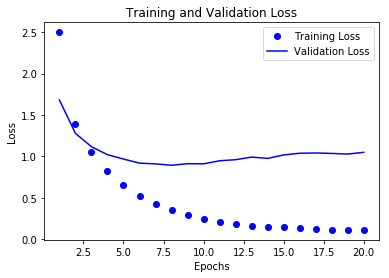

In [25]:
import matplotlib.pyplot as plt

loss =history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

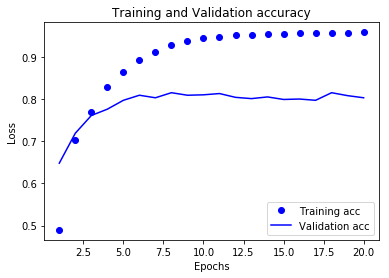

In [39]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
results = model.evaluate(x_test , one_hot_test_labels)

2246/2246 [==============================] - 1s 307us/step


In [41]:
results

[1.223338853856441, 0.786286731967943]

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu' , input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 8,
                    batch_size = 512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 296us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 2s 218us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 2s 224us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 157us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 160us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/8
7982/7982 [==============================] - 2s 218us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/8
7982/7982 [==============================] - 2s 226us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [43]:
results = model.evaluate(x_test , one_hot_test_labels)

2246/2246 [==============================] - 1s 278us/step


In [44]:
results

[0.9847470472035191, 0.7845057880676759]

In [45]:
#Ara katman düğüm sayısını örneğin 4 yaparak 20 epoch için deneyi tekrarlarsak
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu' , input_shape=(10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 361us/step - loss: 2.4673 - acc: 0.5197 - val_loss: 1.7741 - val_acc: 0.5960
Epoch 2/20
7982/7982 [==============================] - 3s 317us/step - loss: 1.5127 - acc: 0.6131 - val_loss: 1.4535 - val_acc: 0.6210
Epoch 3/20
7982/7982 [==============================] - 2s 253us/step - loss: 1.2234 - acc: 0.6746 - val_loss: 1.3322 - val_acc: 0.6820
Epoch 4/20
7982/7982 [==============================] - 2s 234us/step - loss: 1.0554 - acc: 0.7456 - val_loss: 1.2710 - val_acc: 0.7100
Epoch 5/20
7982/7982 [==============================] - 2s 203us/step - loss: 0.9415 - acc: 0.7610 - val_loss: 1.2574 - val_acc: 0.7200
Epoch 6/20
7982/7982 [==============================] - 2s 284us/step - loss: 0.8533 - acc: 0.7813 - val_loss: 1.2789 - val_acc: 0.7090
Epoch 7/20
7982/7982 [==============================] - 2s 297us/step - loss: 0.7824 - acc: 0.8006 - val_loss: 1.2913 - val_acc: 0.7270


In [46]:
results = model.evaluate(x_test , one_hot_test_labels)

2246/2246 [==============================] - 1s 273us/step


In [47]:
results

[1.9529456752597065, 0.7016918967052538]

Buna göre genel olarak sınıf sayısının altında saklı katman boyutu seçmemeliyiz! En az 46
düğümlü katman olmalı! 